In [78]:
import pandas as pd
from matplotlib import pyplot as plt

In [79]:
df1= pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [22]:
df1.shape

(541909, 8)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


DATA CLEANING: HANDLE MISSING VALUES

In [77]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [28]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [85]:
df1[df1.StockCode=='22139'].Description.mode()

0    RETROSPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: string

In [86]:
most_freq= df1[['StockCode', 'Description']].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [90]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [91]:
most_freq.columns= ['StockCode', 'freq_Description','count']
df2= df1.merge(most_freq, on="StockCode", how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [95]:
df2['freq_Description']

0         WHITE HANGING HEART T-LIGHT HOLDER
1         CREAM HANGING HEART T-LIGHT HOLDER
2                                          ?
3                wrongly marked carton 22804
4                        WHITE METAL LANTERN
                         ...                
711026          CHILDREN'S APRON DOLLY GIRL 
711027         CHILDRENS CUTLERY DOLLY GIRL 
711028              KIDS CUTLERY DOLLY GIRL 
711029       CHILDRENS CUTLERY CIRCUS PARADE
711030         BAKING SET 9 PIECE RETROSPOT 
Name: freq_Description, Length: 711031, dtype: string

In [98]:
df2['Description']= df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [57]:
df2.isnull().sum()

InvoiceNo                0
StockCode                0
Description            112
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          171188
Country                  0
freq_Description       112
count                  112
dtype: int64

In [97]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()


InvoiceNo                0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          171076
Country                  0
freq_Description         0
count                    0
dtype: int64

In [ ]:
df2.drop(['freq_Description', 'count'], axis='columns', inplace= True)
df2.head()

In [66]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,710919.000000,710919,710919.000000,539843.000000
mean,9.718405,2011-07-05 11:53:55.375253248,4.410160,15290.162562
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 15:12:00,1.250000,13956.000000
50%,3.000000,2011-07-20 16:17:00,2.100000,15152.000000
75%,10.000000,2011-10-19 10:31:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,194.114446,NaN,84.525607,1709.392583


In [76]:
df2[df2.UnitPrice <0]
df3= df2[(df2.Quantity>0) & (df2.UnitPrice>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,693945.000000,693945,693945.000000,527365.000000
mean,10.873889,2011-07-05 15:59:13.143203328,3.874301,15296.797165
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-29 15:20:00,1.250000,13969.000000
50%,4.000000,2011-07-21 10:44:00,2.100000,15159.000000
75%,12.000000,2011-10-19 11:49:00,4.130000,16794.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,137.669424,NaN,31.507544,1708.785281


SALES ANALYSIS

In [104]:
df4= df3.copy()
df4['TotalSales']= df4['Quantity']*df4["UnitPrice"]
df4.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [105]:
df4["Month"]= df4['InvoiceDate'].dt.month
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


Visualisation and EDA

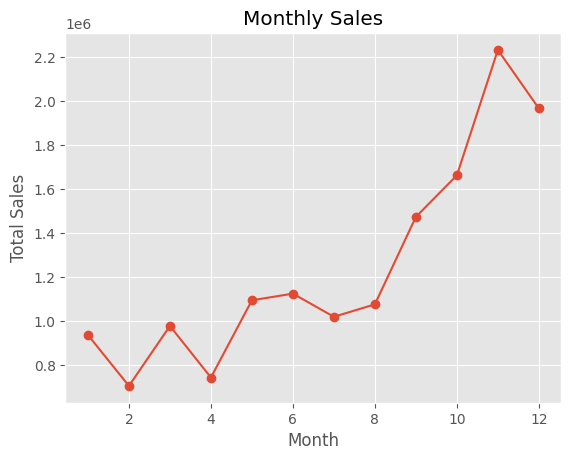

In [115]:
monthly_sales= df4.groupby('Month')["TotalSales"].sum()
monthly_sales.plot(kind= "line", title= "Monthly Sales", marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [120]:
top_5_countrites= df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head()
top_5_countrites

Country
United Kingdom    1.269449e+07
Netherlands       4.316229e+05
EIRE              3.937788e+05
Germany           3.051400e+05
France            3.028098e+05
Name: TotalSales, dtype: float64

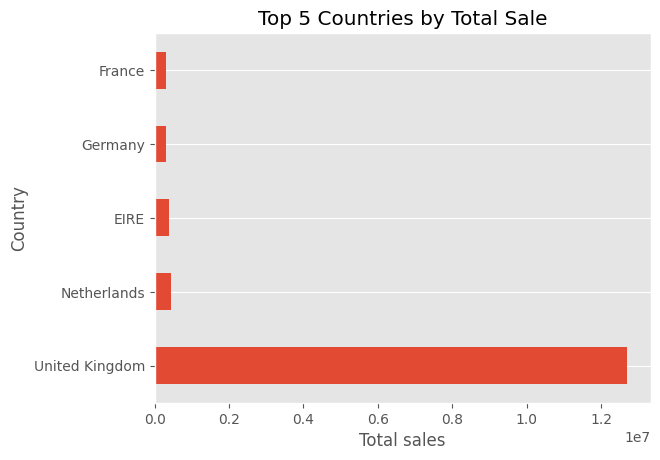

In [124]:
top_5_countrites.plot(kind= "barh", title= 'Top 5 Countries by Total Sale')
plt.xlabel('Total sales')
plt.ylabel('Country')
plt.grid(axis= 'x')
plt.show()
